# HEART DISEASE

----

# Logistic Regression 

**Classification Model that can predict whether or not a person has presence of heart disease. This is gonna be based on physical features of that person (cholesterol, age, sex, blood pressure, chest pain type, etc)**

## About the dataset

Contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Owners:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../DATA/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Binary classification problem
df['target'].unique()

array([1, 0])

## Exploratory Data Analysis and Visualization

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


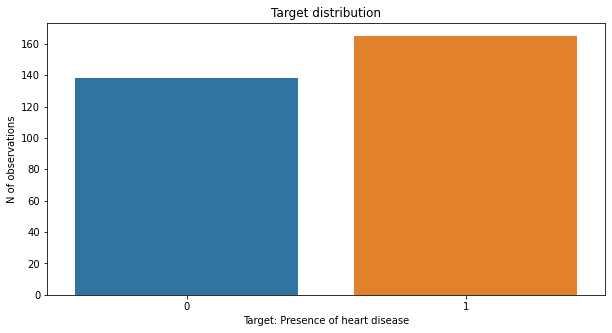

In [102]:
# Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='target', data=df).set_title('Target distribution')
plt.xlabel('Target: Presence of heart disease')
plt.ylabel('N of observations')
plt.show()

In [13]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

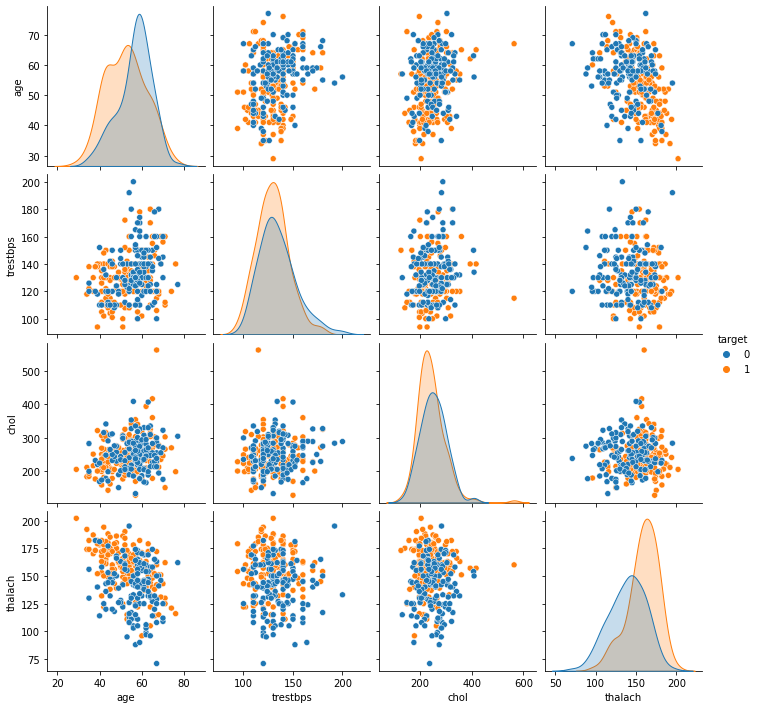

In [15]:
columns =  ['age','trestbps', 'chol','thalach','target']

sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target')

**TASK: Create a heatmap that displays the correlation between all the columns.**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'target')])

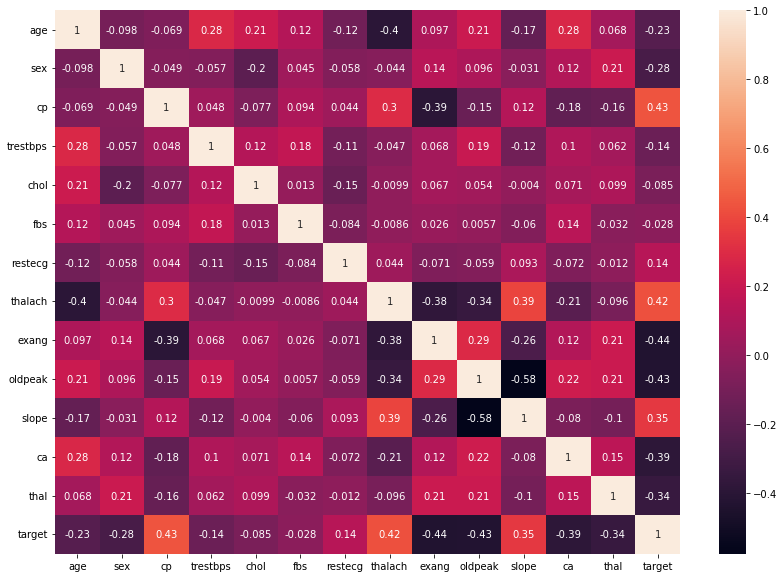

In [27]:
# Heatmap and check correlations.
plt.figure(figsize = (14,10))
sns.heatmap(data=df.corr(), annot=True)
plt.yticks(rotation=0)

In [30]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


----
----

# Machine Learning

## Train | Test Split and Scaling



In [33]:
X = df.drop('target', axis=1)
y = df['target']

In [34]:
# CODE HERE
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

In [37]:
(len(X_train), len(X_test))

(272, 31)

#### Scale features (avoid fitting with X test otherwise we would be data leaking from the test set)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [42]:
log_model = LogisticRegression()

In [246]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C':np.logspace(-4,10,40)}

In [247]:
clf = GridSearchCV(log_model, param_grid=param_grid, cv=10,verbose=0)

In [248]:
best_clf = clf.fit(scaled_X_train, y_train)

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
800 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/s

In [249]:
best_clf.best_params_

{'C': 0.17012542798525893, 'penalty': 'l2'}

In [250]:
best_clf.best_estimator_

LogisticRegression(C=0.17012542798525893)

In [251]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [252]:
y_pred = best_clf.predict(scaled_X_test)

In [253]:
accuracy_score(y_test, y_pred)

0.8709677419354839

In [254]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.81      1.00      0.89        17

    accuracy                           0.87        31
   macro avg       0.90      0.86      0.86        31
weighted avg       0.90      0.87      0.87        31



In [255]:
# Coef best estimator
coef_values = best_clf.best_estimator_.coef_
coef_values

array([[-0.09328242, -0.58099526,  0.68125195, -0.20863236, -0.19070115,
        -0.01752988,  0.17697366,  0.41918812, -0.37049086, -0.5568765 ,
         0.25954646, -0.60597151, -0.52946198]])

In [256]:
# Creating pd Series for the barplot

coef_model = pd.Series(index=X.columns, data = coef_values[0])
coef_model = coef_model.sort_values()

In [257]:
coef_model.values

array([-0.60597151, -0.58099526, -0.5568765 , -0.52946198, -0.37049086,
       -0.20863236, -0.19070115, -0.09328242, -0.01752988,  0.17697366,
        0.25954646,  0.41918812,  0.68125195])

<AxesSubplot:>

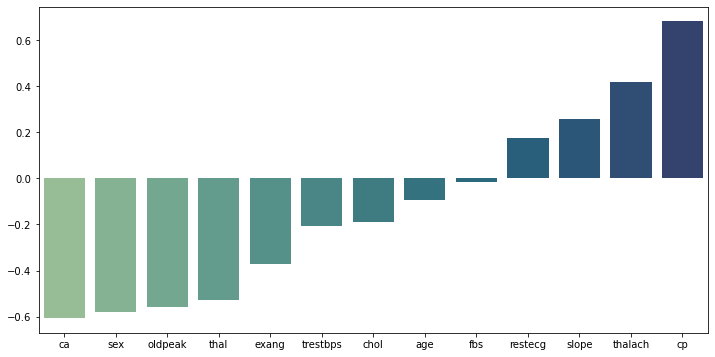

In [258]:
plt.figure(figsize=(12,6))
sns.barplot(x=coef_model.index, y=coef_model.values,palette='crest')

---------

## Model Performance Evaluation

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [259]:
# CODE HERE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

In [260]:
print('Accuracy:', round(accuracy_score(y_test, y_pred),5))

Accuracy: 0.87097


In [261]:
# CODE HERE
print('Confussion matrix')

print(classification_report(y_test, y_pred))

Confussion matrix
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.81      1.00      0.89        17

    accuracy                           0.87        31
   macro avg       0.90      0.86      0.86        31
weighted avg       0.90      0.87      0.87        31



/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


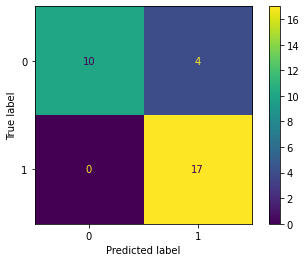

In [262]:
# Deprecated

plot_confusion_matrix(best_clf, scaled_X_test, y_test)

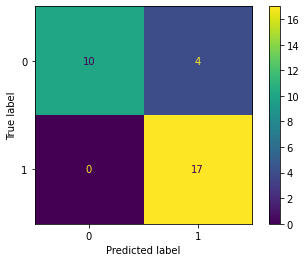

In [263]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

### Performance Curves

In [264]:
# CODE HERE
from sklearn.metrics import plot_precision_recall_curve, PrecisionRecallDisplay, precision_recall_curve, RocCurveDisplay

In [265]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

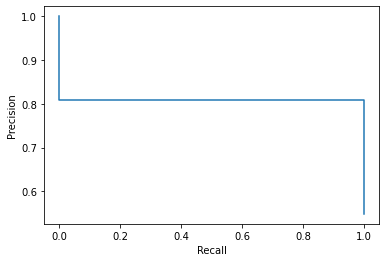

In [266]:
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

/Users/temporaryadmin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


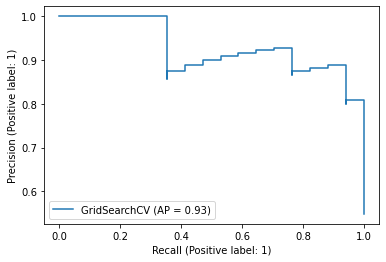

In [267]:
# deprecated

plot_precision_recall_curve(best_clf, scaled_X_test, y_test)

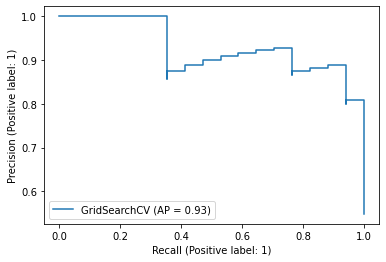

In [268]:
PrecisionRecallDisplay.from_estimator(best_clf, scaled_X_test, y_test)

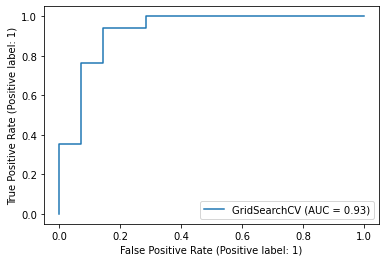

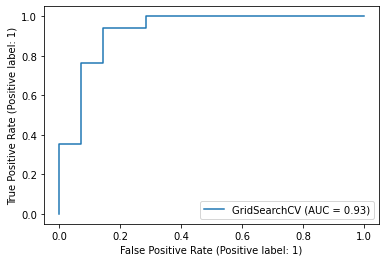

In [269]:
# CODE HERE
RocCurveDisplay.from_estimator(best_clf, scaled_X_test, y_test).plot()
plt.show()

**Example testing -- Prediction for a patient with the following features:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [270]:
patient_info = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [271]:
# CODE HERE
outcome = best_clf.predict(patient_info)
probab = best_clf.predict_proba(patient_info)

print('The patient prediction: ', outcome[0])

The patient prediction:  0
